# Winners of the Top 5 European Soccer Leagues (2014-2019) - Were they lucky?

[GITHUB REPO: UCDPA_mauricecostelloe](https://github.com/mcostelloe/ucd-assignment)

# Data Source

**Datasource:** (https://www.kaggle.com/slehkyi/web-scraping-football-statistics-2014-now/data)

**Dataset:** *Data from top 5 leagues in csv format which was pulled from the website **understat.com** using the web scraping methodology described in the link above* [Dataset](https://github.com/mcostelloe/ucd-assignment/tree/main/Data)

# Abstract

**This project aims to investigate the relationships that may exist between a team's total points, expected points, total goals, total expected goals & the creation of a new metric "Luck" each season for Europe's top 5 leagues (2014 - 2019)**



To allow for fair analysis between leagues, we must introduce PPG (Pts per game) as not all the top 5 leagues play 38 games per season. We want to investigate the dataset to identify any common trends for the most dominant teams across these leagues. What part does "Luck" (Defined below) play, if any when a team win's their domestic league? Analyse the importance of scoring goals vs. conceding less in the run up to winning the league - Which is more important, a solid defence or exciting attack?

### Definition of Metrics in Dataset:

**List of metrics taken from:** https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg

* **xG - "Expected Goals":** It is a statistical measure of the quality of chances created and conceded. Taken from [understat.com](understat.com)

* **xG_diff:** Difference between actual goals scored and expected goals.

* **npxG** - expected goals without penalties and own goals.

* **xGA** - expected goals against.

* **xGA_diff** - difference between actual goals missed and expected goals against.

* **xpts** - expected points

* **xpts_diff** - difference between actual and expected points

### Metrics I have created: 

* **Total Points Luck Definition** - The Difference between league points and expected points each season
* **Goals Scored Luck Definition** - Difference between league goals and expected goals each season
* **Goals Against Luck Definition** - Difference between league goals conceded and expected goals conceded each season

**Questions**
* Are xG, xGA & xpts **reliable metrics**? Prove this 

* Who are the most dominant teams in Europe?

* What impact (If any) does luck play in the end league position for each team?

* Can we identify any years / competitions where the winner was **"Lucky"** to win the league (Based on the difference between their expected points and that of the 2nd place side)

* Explore other relationships between metrics that can describe team performance over the course of a season 

## 1. Import Functions

In [12]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Clean Data

In [13]:
# Data Source using API
api_data_pull = requests.get('https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg')

db = pd.DataFrame(api_data_pull)

In [14]:
# Read csv data using Pandas 
team_data = pd.read_csv('C:/Users/costelloem/ucd-assignment/Data/stats_by_team.csv')
team_data.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [15]:
# Re-Write dataset inserting column names for column 1 & 2
team_stats = team_data.rename(index=int, columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year', 'missed': 'GA'}) 
team_stats.head()

,league,year,position,team,matches,wins,draws,loses,scored,GA,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [16]:
# Remove unwanted columns:
team_stats = team_stats[['league', 'year', 'position', 'matches', 'wins', 'team', 'scored', 'xG', 'xG_diff', 'GA', 'xGA', 'xGA_diff', 'pts', 'xpts', 'xpts_diff']]

In [17]:
# Examine all columns & data types
# team_stats.info()

In [18]:
# Show that the dataset has no NULL values:
team_stats.isnull().sum()

league       0
year         0
position     0
matches      0
wins         0
team         0
scored       0
xG           0
xG_diff      0
GA           0
xGA          0
xGA_diff     0
pts          0
xpts         0
xpts_diff    0
dtype: int64

In [19]:
"""
We are only interested in the Top 5 European leagues

These are: 
English Premier League, Italian Serie A, Spanish La Lig, German Bundesliga & French Ligue 1
"""
# What leagues are available in this dataset? We're only interested in the top 5
team_stats['league'].unique()

# Filter dataset for Europe's top 5 Leagues: PL, Serie A, Bundesliga, La Liga & Ligue 1:
team_stats = team_stats[team_stats.league != 'RFPL']

In [20]:
# List of Europe's top 5 leagues:
team_stats['league'].unique()

array(['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1'], dtype=object)

### Add new metrics:

In [21]:
"""
To allow for fair analysis of "Luck" metric - We need to add a PPG column to the data as the 
number of games played across all 5 leagues are not consistent

Points per game, goals per game etc ...
"""

# Some leagues might not have 38 games - We need to normalise their points using PPG (Pts per game):
team_stats['pts_per_game'] = team_stats['pts'] / team_stats['matches']

team_stats['xpts_per_game'] = team_stats['xpts'] / team_stats['matches']

# Do the same for goals & exp goals per game:
team_stats['G_per_game'] = team_stats['scored'] / team_stats['matches']

team_stats['xG_per_game'] = team_stats['xG'] / team_stats['matches']


# Do the same for goals against & exp goals against per game:
team_stats['GA_per_game'] = team_stats['GA'] / team_stats['matches']

team_stats['xGA_per_game'] = team_stats['xGA'] / team_stats['matches']

In [22]:
team_stats.head()

,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,...,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,...,7.444293,94,94.0813,0.0813,2.473684,2.475824,2.894737,2.710004,0.552632,0.748534
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,...,4.607198,92,81.7489,-10.2511,2.421053,2.151287,3.105263,2.520164,1.000000,1.121242
2,La_liga,2014,3,38,23,Atletico Madrid,67,57.047670,-9.952330,29,...,0.069107,78,73.1353,-4.8647,2.052632,1.924613,1.763158,1.501254,0.763158,0.764977
3,La_liga,2014,4,38,22,Valencia,70,55.062500,-14.937500,32,...,7.392572,77,63.7068,-13.2932,2.026316,1.676495,1.842105,1.449013,0.842105,1.036647
4,La_liga,2014,5,38,23,Sevilla,71,69.526624,-1.473376,45,...,2.862742,76,67.3867,-8.6133,2.000000,1.773334,1.868421,1.829648,1.184211,1.259546


### Luck Metrics: 

## 3. Analyse Dataset

In [25]:
# Show average team position, pts and expected pts from 2014 - 2019:
team_mean_stats = team_stats.groupby(['league','team'])[['position', 'wins', 'pts_per_game', 'xpts_per_game', 'G_per_game', 'xG_per_game', 'GA_per_game', 'xGA_per_game']].mean()

team_mean_stats.head()

position       wins  pts_per_game  \
league     team                                                      
Bundesliga Augsburg             12.166667  10.000000      1.147059   
           Bayer Leverkusen      5.166667  16.333333      1.656863   
           Bayern Munich         1.000000  25.833333      2.416667   
           Borussia Dortmund     3.500000  19.000000      1.901961   
           Borussia M.Gladbach   5.666667  16.166667      1.632353   

                                xpts_per_game  G_per_game  xG_per_game  \
league     team                                                          
Bundesliga Augsburg                  1.197223    1.269608     1.243859   
           Bayer Leverkusen          1.643118    1.759804     1.644728   
           Bayern Munich             2.246033    2.593137     2.347045   
           Borussia Dortmund         1.917704    2.107843     1.997726   
           Borussia M.Gladbach       1.555497    1.632353     1.622488   

                                GA_per_game  xGA_per_game  
league     team                                            
Bundesliga Augsburg                1.598039      1.560301  
           Bayer Leverkusen        1.333333      1.267879  
           Bayern Munich           0.730392      0.805379  
           Borussia Dortmund       1.215686      1.092821  
           Borussia M.Gladbach     1.269608      1.376773

In [57]:
"""
Sort the most dominant teams in Europe by looking at their average PPG over 5 years

We expect to see a strong positive correlation with their average exp PPG

Teams with an av. league position of < 2 can be considered extremely dominant
"""

# Sort Teams by their average points to rank the most dominant teams:
team_mean_stats = team_mean_stats.sort_values("pts_per_game", ascending=False)

# Can we see any trend develop by looking at the top achieving teams
team_mean_stats.head(10).sort_values("pts_per_game", ascending=False).reset_index()

,league,team,position,wins,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,Bundesliga,Bayern Munich,1.000000,25.833333,2.416667,2.246033,2.593137,2.347045,0.730392,0.805379
1,Ligue_1,Paris Saint Germain,1.166667,26.833333,2.393437,2.301254,2.572612,2.366686,0.788499,0.777667
2,Serie_A,Juventus,1.000000,28.000000,2.355263,1.982767,2.000000,1.703216,0.736842,0.790929
3,La_liga,Barcelona,1.333333,27.666667,2.355263,2.205925,2.688596,2.438183,0.833333,0.956863
4,La_liga,Real Madrid,2.000000,26.000000,2.219298,2.059038,2.460526,2.233273,1.000000,1.103612
5,EPL,Manchester City,2.333333,26.000000,2.201754,2.180411,2.355263,2.233439,0.890351,0.854466
6,La_liga,Atletico Madrid,2.833333,22.833333,2.057018,1.789012,1.596491,1.462709,0.666667,0.862436
7,EPL,Liverpool,4.166667,23.166667,2.057018,1.892132,1.978070,1.775577,1.021930,0.957257
8,Serie_A,Napoli,3.500000,23.166667,2.030702,1.992286,2.000000,1.816245,1.052632,0.869130
9,Serie_A,Roma,3.500000,22.000000,1.973684,1.802811,1.890351,1.800944,1.039474,1.131859


In [24]:
# Index Dataframe using Index on League:
# top_teams = top_teams.set_index("league")

In [20]:
# To reset index - Show league beside each team use:
team_mean_stats.reset_index().head(10)

,league,team,position,wins,pts_per_game,xpts_per_game,G_per_game,xG_per_game
0,Bundesliga,Bayern Munich,1.000000,25.833333,2.416667,2.246033,2.593137,2.347045
1,Ligue_1,Paris Saint Germain,1.166667,26.833333,2.393437,2.301254,2.572612,2.366686
2,Serie_A,Juventus,1.000000,28.000000,2.355263,1.982767,2.000000,1.703216
3,La_liga,Barcelona,1.333333,27.666667,2.355263,2.205925,2.688596,2.438183
4,La_liga,Real Madrid,2.000000,26.000000,2.219298,2.059038,2.460526,2.233273
5,EPL,Manchester City,2.333333,26.000000,2.201754,2.180411,2.355263,2.233439
6,La_liga,Atletico Madrid,2.833333,22.833333,2.057018,1.789012,1.596491,1.462709
7,EPL,Liverpool,4.166667,23.166667,2.057018,1.892132,1.978070,1.775577
8,Serie_A,Napoli,3.500000,23.166667,2.030702,1.992286,2.000000,1.816245
9,Serie_A,Roma,3.500000,22.000000,1.973684,1.802811,1.890351,1.800944


In [32]:
# Slicing dataset to look at top 2 teams each year:
team_stats.loc[team_stats['position'] <= 2]


,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,...,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,...,7.444293,94,94.0813,0.0813,2.473684,2.475824,2.894737,2.710004,0.552632,0.748534
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,...,4.607198,92,81.7489,-10.2511,2.421053,2.151287,3.105263,2.520164,1.000000,1.121242
20,La_liga,2015,1,38,29,Barcelona,112,113.598270,1.598270,29,...,5.029090,91,94.3800,3.3800,2.394737,2.483684,2.947368,2.989428,0.763158,0.895502
21,La_liga,2015,2,38,28,Real Madrid,110,90.454148,-19.545852,34,...,11.233782,90,79.0927,-10.9073,2.368421,2.081387,2.894737,2.380372,0.894737,1.190363
40,La_liga,2016,1,38,29,Real Madrid,106,90.866410,-15.133590,41,...,-4.137441,93,86.1701,-6.8299,2.447368,2.267634,2.789474,2.391221,1.078947,0.970067
41,La_liga,2016,2,38,28,Barcelona,116,93.551594,-22.448406,37,...,-5.684337,90,87.9535,-2.0465,2.368421,2.314566,3.052632,2.461884,0.973684,0.824096
60,La_liga,2017,1,38,28,Barcelona,99,90.486752,-8.513248,29,...,12.620820,93,79.4375,-13.5625,2.447368,2.090461,2.605263,2.381230,0.763158,1.095285
61,La_liga,2017,2,38,23,Atletico Madrid,58,50.290480,-7.709520,22,...,13.483820,79,61.5989,-17.4011,2.078947,1.621024,1.526316,1.323434,0.578947,0.933785
80,La_liga,2018,1,38,26,Barcelona,90,83.279534,-6.720466,36,...,8.930950,87,73.9604,-13.0396,2.289474,1.946326,2.368421,2.191567,0.947368,1.182393
81,La_liga,2018,2,38,22,Atletico Madrid,55,51.872324,-3.127676,29,...,12.434059,76,59.4276,-16.5724,2.000000,1.563884,1.447368,1.365061,0.763158,1.090370


### Subset Data: Top 2 teams each year

Which teams were "Lucky" to win the league on any given year (Luck = 1st place exp points per game < 2nd place exp points per game)

In [33]:
"""
To invesigate the idea around "Luck" - We need to filter for the top 2 teams each season 

Can we find any examples where the team finishing 2nd actually had a higher expected points & xPPG 
over the course of the season 

In this case, we consider the winner to be "Lucky" if they have a lower expected Points per game
than the team finishing 2nd place 

"""

# look into the battle for top spot each year from 2014 - 2019:
top_2_teams = team_stats[(team_stats['position'] <= 2)] #& (team_stats['league'] == 'EPL')]

top_2_teams.head(20)

,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,...,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,...,7.444293,94,94.0813,0.0813,2.473684,2.475824,2.894737,2.710004,0.552632,0.748534
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,...,4.607198,92,81.7489,-10.2511,2.421053,2.151287,3.105263,2.520164,1.000000,1.121242
20,La_liga,2015,1,38,29,Barcelona,112,113.598270,1.598270,29,...,5.029090,91,94.3800,3.3800,2.394737,2.483684,2.947368,2.989428,0.763158,0.895502
21,La_liga,2015,2,38,28,Real Madrid,110,90.454148,-19.545852,34,...,11.233782,90,79.0927,-10.9073,2.368421,2.081387,2.894737,2.380372,0.894737,1.190363
40,La_liga,2016,1,38,29,Real Madrid,106,90.866410,-15.133590,41,...,-4.137441,93,86.1701,-6.8299,2.447368,2.267634,2.789474,2.391221,1.078947,0.970067
41,La_liga,2016,2,38,28,Barcelona,116,93.551594,-22.448406,37,...,-5.684337,90,87.9535,-2.0465,2.368421,2.314566,3.052632,2.461884,0.973684,0.824096
60,La_liga,2017,1,38,28,Barcelona,99,90.486752,-8.513248,29,...,12.620820,93,79.4375,-13.5625,2.447368,2.090461,2.605263,2.381230,0.763158,1.095285
61,La_liga,2017,2,38,23,Atletico Madrid,58,50.290480,-7.709520,22,...,13.483820,79,61.5989,-17.4011,2.078947,1.621024,1.526316,1.323434,0.578947,0.933785
80,La_liga,2018,1,38,26,Barcelona,90,83.279534,-6.720466,36,...,8.930950,87,73.9604,-13.0396,2.289474,1.946326,2.368421,2.191567,0.947368,1.182393
81,La_liga,2018,2,38,22,Atletico Madrid,55,51.872324,-3.127676,29,...,12.434059,76,59.4276,-16.5724,2.000000,1.563884,1.447368,1.365061,0.763158,1.090370


In [36]:
"""
xpts_Luck variable: Calculates the difference between the exp points of team 1 vs. team 2 

"""

# Shows the difference between expected points for 1st & 2nd:
top_2_teams['xpts_Luck'] = top_2_teams['xpts'].diff()


C:\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [77]:
# Filter so we can check if 2nd position have been "Unlucky" in their attempt in winning the league:
unlucky_teams = top_2_teams[(top_2_teams['position']==2) & (top_2_teams['xpts_Luck'] > 0)]

In [78]:
unlucky_teams = unlucky_teams.sort_values('xpts_Luck', ascending=False).set_index('league')

In [74]:
unlucky_teams.sort_values('xpts_Luck')

,year,position,matches,wins,team,scored,xG,xG_diff,GA,xGA,...,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game,xpts_Luck
league,,,,,,,,,,,,,,,,,,,,,
Serie_A,2015,2,38,25,Napoli,80,69.526830,-10.473170,32,26.685810,...,82,79.0669,-2.9331,2.157895,2.080708,2.105263,1.829653,0.842105,0.702258,0.3235
La_liga,2016,2,38,28,Barcelona,116,93.551594,-22.448406,37,31.315663,...,90,87.9535,-2.0465,2.368421,2.314566,3.052632,2.461884,0.973684,0.824096,1.7834
Serie_A,2018,2,38,24,Napoli,74,68.237943,-5.762057,36,36.502336,...,79,74.4511,-4.5489,2.078947,1.959239,1.947368,1.795735,0.947368,0.960588,3.5212
Serie_A,2019,2,38,24,Inter,81,73.953151,-7.046849,36,39.357559,...,82,75.3771,-6.6229,2.157895,1.983608,2.131579,1.946136,0.947368,1.035725,4.1377
EPL,2015,2,38,20,Arsenal,65,73.530928,8.530928,36,33.857479,...,71,77.0087,6.0087,1.868421,2.026545,1.710526,1.935024,0.947368,0.890986,8.0645
Serie_A,2017,2,38,28,Napoli,77,70.453625,-6.546375,29,25.266163,...,91,82.2324,-8.7676,2.394737,2.164011,2.026316,1.854043,0.763158,0.664899,8.7266
Ligue_1,2016,2,38,27,Paris Saint Germain,83,82.162399,-0.837601,27,24.247968,...,87,87.2195,0.2195,2.289474,2.295250,2.184211,2.162168,0.710526,0.638104,9.1636
EPL,2019,2,38,26,Manchester City,102,102.205233,0.205233,35,36.997629,...,81,86.7564,5.7564,2.131579,2.283063,2.684211,2.689611,0.921053,0.973622,12.4780


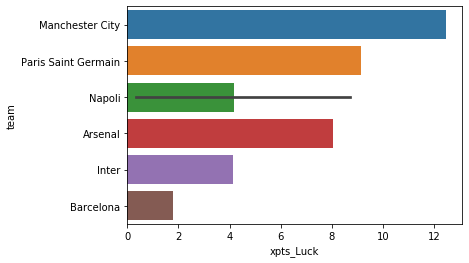

In [79]:
"""
Sort teams by their level of "luck"

Napoli have appeared 3 times in 5 years

Man City were incredibly "Unlucky" with a 12 point gap in expected total points between
them and 1st place Liverpool 
"""
sns.barplot(y= unlucky_teams['team'], x= unlucky_teams['xpts_Luck'])

### High Level Results:


* **8 teams have been found to be "Lucky" in their victory over rivals across this 5 year period - Napoli take 3 of these spots**
* Arsenal in 2015 - Finishing 2nd place to Leicester City. They had a higher "Expected Points" tally at the end of the season by over 8 points. They also under-performed with their total goals tally and goals against (Unlucky across all 3 metrics)
* Most of the other unlucky sides had a very tight title race with just a few expected points making up the difference 
* Looking at Man City in 2019, their xG and xGA were hit by actuals but they got almost 6 points less than expected. So while they were unlucky over the course of the season, Liverpool (1st place) were very lucky to then pull away with such a big gap in expected points

## 4. Results & Graphs

### How reliable are xG, xGA and xpts as a performance metric? 

In [39]:
"""
To examine this, we look at the correlation between these metrics for this 
5 year period for the top 5 leagues 

We expect to see a strong position correlation between points vs. exp points,
goals scored vs. xG and goals conceded vs. xGA 

We will also look into the relationship between other metrics 
"""

'\nTo examine this, we look at the correlation between these metrics for this \n5 year period for the top 5 leagues \n\nWe expect to see a strong position correlation between points vs. exp points,\ngoals scored vs. xG and goals conceded vs. xGA \n\nWe will also look into the relationship between other metrics \n'

### Scatter Plot of Points vs. Expected Points metrics:

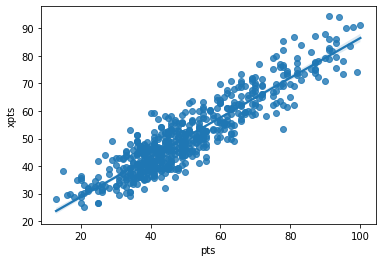

In [40]:
# use the function regplot to make a scatterplot
sns.regplot(x=team_stats["pts"], y=team_stats["xpts"])

### Scatter Plot of Goals vs. Expected Goals metrics:

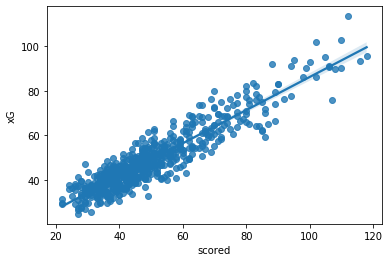

In [41]:
sns.regplot(x=team_stats["scored"], y=team_stats["xG"])

### Scatter Plot of Goals Against vs. Expected Goals Against metrics:

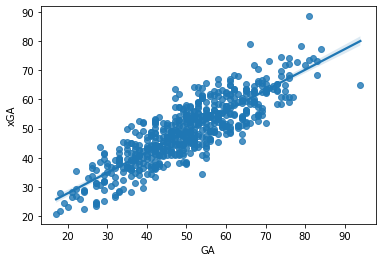

In [42]:
sns.regplot(x=team_stats["GA"], y=team_stats["xGA"])

All relationship here have a strong positive correlation for the dataset's top 5 leagues - Showing that the expected metrics do a good job in describing team performance with enough data

### Explore the relationship different metrics have with points & expected points tally

In [43]:
df = team_stats[['pts', 'scored', 'xG', 'xpts']]

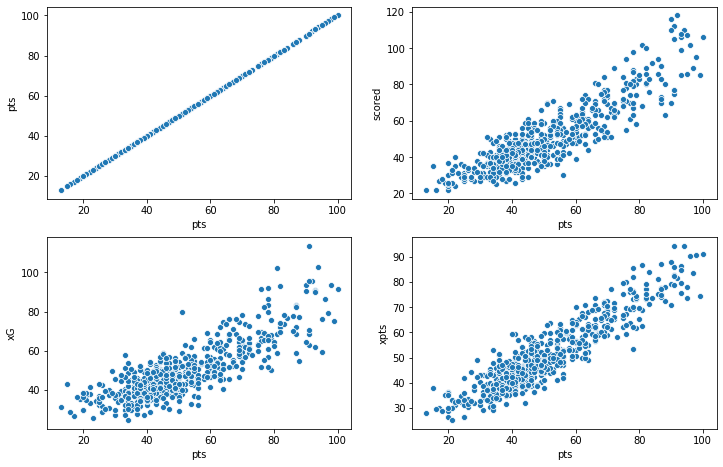

In [55]:
# Create a function to look at each metric and their relationship with total points each season 

# Plot out all of the datapoints for the top 5 leagues:
count = 1
plt.subplots(figsize = (12, 12))

for i in df.columns:
    plt.subplot(3, 2, count)
    sns.scatterplot(df["pts"], df[i])
    count += 1

plt.show()

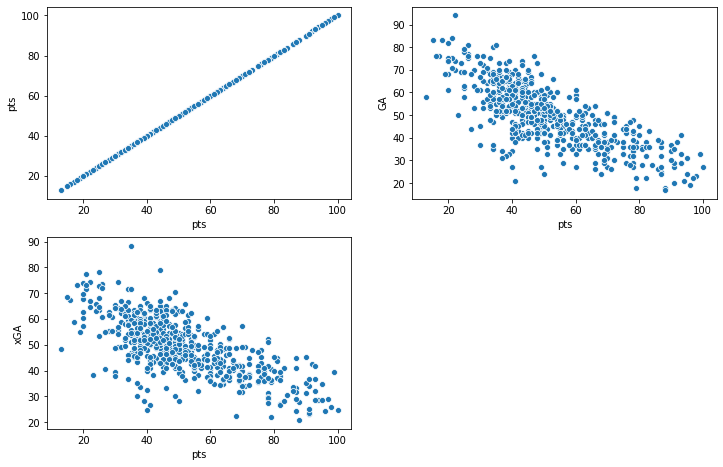

In [81]:
# Do the same again for the - GA & xGA Metrics:
df = team_stats[['pts', 'GA', 'xGA']]

count = 1
plt.subplots(figsize = (12, 12))

for i in df.columns:
    plt.subplot(3, 2, count)
    sns.scatterplot(df["pts"], df[i])
    count += 1

plt.show()

We can see how the different performance metrics match up, but we'll need a more detailed view to check which metrics influence points / exp points the most

### What is more correlated to total points - Goals Scored or Goals Conceded?

In [45]:
# List of metrics we're interested in:
metric_correlations = team_stats[['league','scored', 'xG', 'GA', 'xGA', 'pts', 'xpts']]

metric_correlations = metric_correlations.set_index('league')

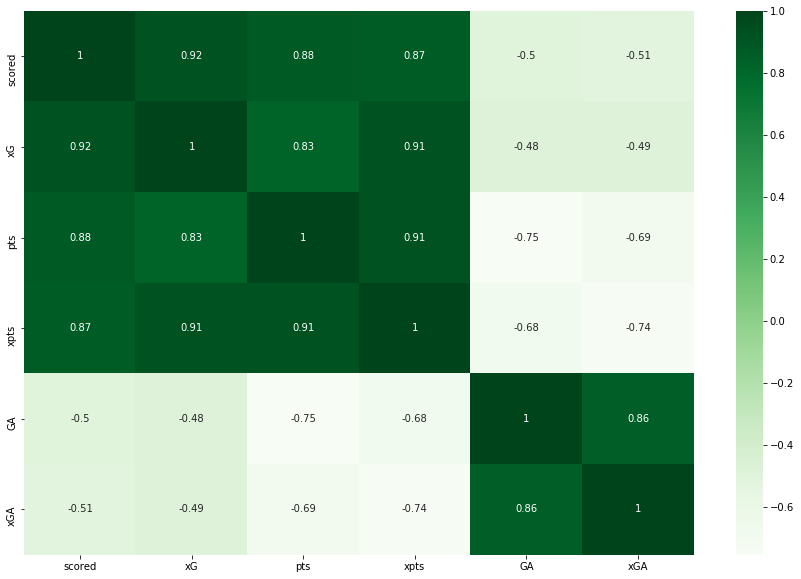

In [51]:
# Corelation between points & goals scored vs. goals conceded

# CHANGE CODE FOR CORRELATION BETWEEN DIFFERENT METRICS:
metric_correlations = team_stats[['league','scored', 'xG', 'pts', 'xpts', 'GA', 'xGA']]
metric_correlations = metric_correlations.set_index('league')

# Create correlations map for all of the metrics above:
corrmat = metric_correlations.corr()
plt.figure(figsize=(15,10))
graph = sns.heatmap(corrmat, annot=True, cmap = 'Greens', xticklabels='auto', yticklabels='auto')  #cmap="YlGnBu"

In [ ]:
# Corelation between expected points & expected goals scored vs. goals conceded


* Graph 1 ...
* 2
* 3


* ...

## 5. Results Summary 

## 6. Insights 